# **20230615**

## 11장 데이터 다루기

### 01 딥러닝과 데이터

- 데이터의 양, 질, 가공 중요

- 

### 02 피마 인디언 데이터 분석하기

- 피처 8개, 1개 레이블(1,0) => 이진분류



### 03 판다스를 활용한 데이터 조사

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('../data/pima-indians-diabetes3.csv')

In [38]:
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
# label 불균형 확인

df['diabetes'].value_counts()

diabetes
0    500
1    268
Name: count, dtype: int64

In [40]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [41]:
df.corr() # 상관계수

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [42]:
colormap = plt.cm.gist_heat 
plt.figure(figsize=(8,8))

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

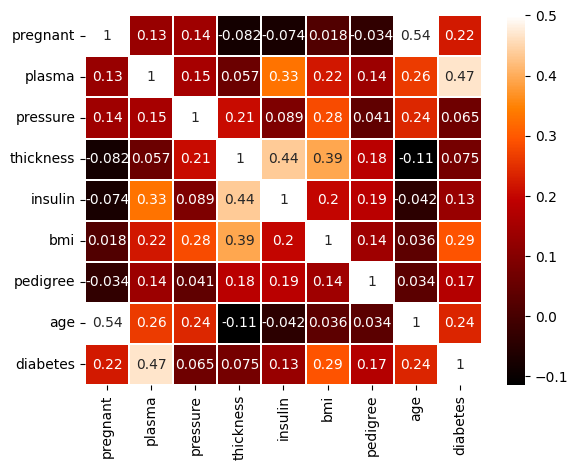

In [43]:
sns.heatmap(df.corr(), linewidths=0.1
            , vmax=0.5  # 색상 밝기조절
            ,cmap=colormap
            ,linecolor = 'white'
            ,annot=True # 값표기 여부
            )
plt.show()

### 04 중요한 데이터 추출하기

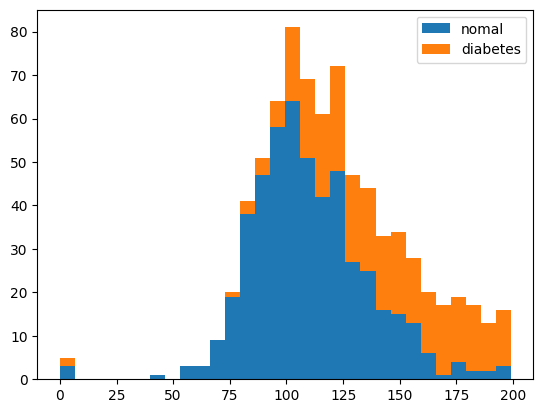

In [44]:
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]]
         ,bins=30   #데이터를 30칸으로분리
         ,histtype='barstacked'
         ,label=['nomal','diabetes']
         )
plt.legend()

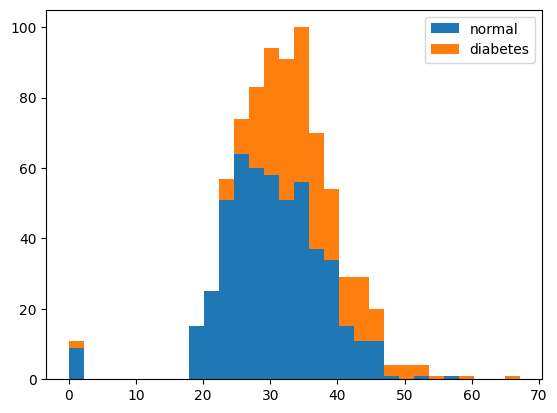

In [45]:
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]]
         ,bins=30
         ,histtype='barstacked'
         ,label=['normal','diabetes']
         )
plt.legend()

### 05 피마 인디언의 당뇨병 예측 실행

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [47]:
X = df.iloc[:,0:8]
y = df.iloc[:,8]

In [48]:
model = Sequential()

# 노드의 개수는 대부분 8의 배수로 지정(최소 256,512정도부터 시작)
model.add(Dense(16,input_dim=8, activation='relu',name='Dense_1'))
model.add(Dense(8,activation='relu',name='Dense_2'))
model.add(Dense(1,activation='sigmoid', name='Dense_3'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 16)                144       
                                                                 
 Dense_2 (Dense)             (None, 8)                 136       
                                                                 
 Dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


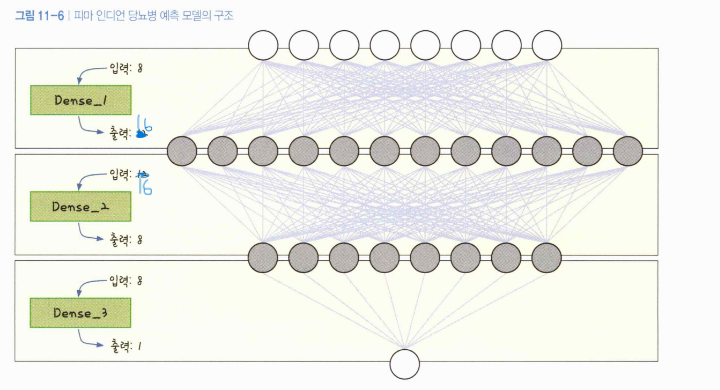

In [51]:
from IPython.display import Image
Image('./ch11_신경망구조.png')

In [50]:
model.compile(loss='binary_crossentropy'
              ,optimizer='adam'
              ,metrics=['accuracy']
              )


history = model.fit(X,y, epochs=100, batch_size=5)

Epoch 1/100
154/154 [==============================] - 1s 2ms/step - loss: 1.2022 - accuracy: 0.6341
Epoch 2/100
154/154 [==============================] - 0s 2ms/step - loss: 0.7934 - accuracy: 0.6797
Epoch 3/100
154/154 [==============================] - 0s 2ms/step - loss: 0.7630 - accuracy: 0.6419
Epoch 4/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.6758
Epoch 5/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.6706
Epoch 6/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.6654
Epoch 7/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.6745
Epoch 8/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6304 - accuracy: 0.6823
Epoch 9/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6422 - accuracy: 0.6849
Epoch 10/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6637 - accura

In [65]:
max(history.history['accuracy'])

0.7825520634651184